<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: West Nile Virus Prediction

# Background

West Nile Virus(WNV) is most commonly spread to humans through infected mosquitoes. Around 20% of the people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death.

In 2002, the first human case of the WNV was reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health(CDPH) had established a comprehensive surveillance and control program that is still in effect today.

Due to the rising seasonal epidemic of the WNV in Chicago, an increasing number of people need medical attention. As such, there is a need for better mosquito control. However, the City of Chicago can only react to the new cases and spraying pesticide is costly and must be done regularly.

# Problem Statement

Build a classification model of at least 90% recall score to predict areas of the city where there are mosquitoes carrying the West Nile Virus. Optimise current mosquito control measures to effectively and efficiently tackle the mosquito problem and create a desirable cost-benefit analysis.

## This notebook consists of Spray Analysis. Please refer to the relevant notebooks for the other parts.

### Contents:
- **Data Cleaning** - *refer to part 1 Data Cleaning notebook*
- **Exploratory Data Analysis & Visualisaion** - *refer to part 2 EDA notebook*
- **Modelling** - *refer to part 3 Modelling notebook*
- **Spray Analysis**
- **Conclusion and Recommendations**

# Spray Analysis

In this notebook we will be analysing the repartition of mosquitoes throughout the years in the city of Chicago and compare it with the spray efforts that have been done in 2011 and 2013.

The purpose of this analysis is to measure the effectiveness of the spray efforts and provide recommendations on where and how to spray to optimize spraying.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon


import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Passing plotly map token
MAPBOX_TOKEN = 'pk.eyJ1IjoiZmNvbWJlbGxlczE4IiwiYSI6ImNsYmZ0MGNhdTA0cmIzdnBmejk0azF6ZzgifQ.b0AOPQEYA4koQBIPbkXeAA'

Importing relevant files and geographical maps

In [2]:
weather = pd.read_csv('data/datasets/weather.csv', parse_dates=True)
train = pd.read_csv('data/datasets/train.csv', parse_dates=True)
test = pd.read_csv('data/datasets/test.csv', parse_dates=True)
spray = pd.read_csv('data/datasets/spray_clean.csv', parse_dates=True)

# Importing Chicago boundary map
chicago = gpd.read_file('data/map/geo_export_c1136ecf-9473-4a42-8d0e-524480fe2323.shp')
crs = {'init': 'epsg:4326'}

Display file head and define Date format for data column

In [3]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
# Define format for date and split it

train['Date'] = pd.to_datetime(train.Date, format='%Y-%m-%d')

train['day'] = train['Date'].dt.day
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year

train['year_month'] = train['Date'].dt.strftime('%Y-%m')

In [5]:
# Display the years present in the dataset

train['year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: year, dtype: int64

In [6]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [7]:
# Define format for date and split it

spray['Date'] = pd.to_datetime(spray.Date, format='%Y-%m-%d')

spray['day'] = spray['Date'].dt.day
spray['month'] = spray['Date'].dt.month
spray['year'] = spray['Date'].dt.year

spray['year_month'] = spray['Date'].dt.strftime('%Y-%m')

* For 2011, spraying was done between August and September
* For 2013, spraying was done between July and September

In [8]:
spray

,Date,Time,Latitude,Longitude,day,month,year,year_month
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,29,8,2011,2011-08
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,29,8,2011,2011-08
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,29,8,2011,2011-08
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,29,8,2011,2011-08
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,29,8,2011,2011-08
...,...,...,...,...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355,5,9,2013,2013-09
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015,5,9,2013,2013-09
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392,5,9,2013,2013-09
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423,5,9,2013,2013-09


##### Create a new Dataframe

This new DataFrame will include the total number of mosquitos per address and the amount of time a trap has been detected as positive 

In [9]:
# New DataFrame with total number of mosquitos per address

mosquito_count = train.groupby(['Address'], as_index = False)[['NumMosquitos']].sum()
areas = train.groupby(['Address'], as_index = False)[['Latitude','Longitude']].median()
wnv = train.groupby(['Address'], as_index = False)[['WnvPresent']].sum()
y = train.groupby(['Address'], as_index = False)[['year']].median()
m = train.groupby(['Address'], as_index = False)[['month']].median()

mosquito_areas_wnv = pd.concat([mosquito_count,areas, wnv, y, m], axis = 1)
#mosquito_areas_wnv.drop('Address', axis = 1, inplace = True)

In [10]:
mosquito_areas_wnv.columns

Index(['Address', 'NumMosquitos', 'Address', 'Latitude', 'Longitude',
       'Address', 'WnvPresent', 'Address', 'year', 'Address', 'month'],
      dtype='object')

In [11]:
# Trying to remove extra address columns

#mosquito_areas_wnv.drop(mosquito_areas_wnv.columns[[2,5]], axis=1, inplace=True)

In [12]:
mosquito_areas_wnv

,Address,NumMosquitos,Address,Latitude,Longitude,Address,WnvPresent,Address,year,Address,month
0,"1000 East 67th Street, Chicago, IL 60637, USA",852,"1000 East 67th Street, Chicago, IL 60637, USA",41.773215,-87.600880,"1000 East 67th Street, Chicago, IL 60637, USA",4,"1000 East 67th Street, Chicago, IL 60637, USA",2009.0,"1000 East 67th Street, Chicago, IL 60637, USA",8.0
1,"1000 North Central Park Avenue, Chicago, IL 60...",1802,"1000 North Central Park Avenue, Chicago, IL 60...",41.899230,-87.716788,"1000 North Central Park Avenue, Chicago, IL 60...",8,"1000 North Central Park Avenue, Chicago, IL 60...",2011.0,"1000 North Central Park Avenue, Chicago, IL 60...",8.0
2,"1000 South California Avenue, Chicago, IL 6061...",125,"1000 South California Avenue, Chicago, IL 6061...",41.869107,-87.696293,"1000 South California Avenue, Chicago, IL 6061...",0,"1000 South California Avenue, Chicago, IL 6061...",2007.0,"1000 South California Avenue, Chicago, IL 6061...",8.0
3,"1000 West 95th Street, Chicago, IL 60643, USA",185,"1000 West 95th Street, Chicago, IL 60643, USA",41.721474,-87.648064,"1000 West 95th Street, Chicago, IL 60643, USA",1,"1000 West 95th Street, Chicago, IL 60643, USA",2007.0,"1000 West 95th Street, Chicago, IL 60643, USA",8.0
4,"1100 North Artesian Avenue, Chicago, IL 60622,...",666,"1100 North Artesian Avenue, Chicago, IL 60622,...",41.903002,-87.688267,"1100 North Artesian Avenue, Chicago, IL 60622,...",4,"1100 North Artesian Avenue, Chicago, IL 60622,...",2009.0,"1100 North Artesian Avenue, Chicago, IL 60622,...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
133,"South Vincennes Avenue, Chicago, IL, USA",374,"South Vincennes Avenue, Chicago, IL, USA",41.723195,-87.649970,"South Vincennes Avenue, Chicago, IL, USA",4,"South Vincennes Avenue, Chicago, IL, USA",2011.0,"South Vincennes Avenue, Chicago, IL, USA",8.0
134,"South Wallace Street, Chicago, IL, USA",28,"South Wallace Street, Chicago, IL, USA",41.753411,-87.639817,"South Wallace Street, Chicago, IL, USA",0,"South Wallace Street, Chicago, IL, USA",2009.0,"South Wallace Street, Chicago, IL, USA",8.5
135,"University of Illinois at Chicago, 1100 South ...",1685,"University of Illinois at Chicago, 1100 South ...",41.868077,-87.666901,"University of Illinois at Chicago, 1100 South ...",7,"University of Illinois at Chicago, 1100 South ...",2009.0,"University of Illinois at Chicago, 1100 South ...",8.0
136,"West 37th Place, Chicago, IL, USA",47,"West 37th Place, Chicago, IL, USA",41.825902,-87.667827,"West 37th Place, Chicago, IL, USA",0,"West 37th Place, Chicago, IL, USA",2007.0,"West 37th Place, Chicago, IL, USA",8.0


In [13]:
# Filtering to show only number of mosquitoes per address in August 2013

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2013) & (mosquito_areas_wnv['month'] == 8),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
16,"1700 North Ashland Avenue, Chicago, IL 60622, USA","1700 North Ashland Avenue, Chicago, IL 60622, USA","1700 North Ashland Avenue, Chicago, IL 60622, USA","1700 North Ashland Avenue, Chicago, IL 60622, USA","1700 North Ashland Avenue, Chicago, IL 60622, USA",286
19,"1700 West Addison Street, Chicago, IL 60613, USA","1700 West Addison Street, Chicago, IL 60613, USA","1700 West Addison Street, Chicago, IL 60613, USA","1700 West Addison Street, Chicago, IL 60613, USA","1700 West Addison Street, Chicago, IL 60613, USA",284
23,"2100 North Cannon Drive, Chicago, IL 60614, USA","2100 North Cannon Drive, Chicago, IL 60614, USA","2100 North Cannon Drive, Chicago, IL 60614, USA","2100 North Cannon Drive, Chicago, IL 60614, USA","2100 North Cannon Drive, Chicago, IL 60614, USA",145
54,"3900 North Springfield Avenue, Chicago, IL 606...","3900 North Springfield Avenue, Chicago, IL 606...","3900 North Springfield Avenue, Chicago, IL 606...","3900 North Springfield Avenue, Chicago, IL 606...","3900 North Springfield Avenue, Chicago, IL 606...",643
74,"5100 West 72nd Street, Chicago, IL 60638, USA","5100 West 72nd Street, Chicago, IL 60638, USA","5100 West 72nd Street, Chicago, IL 60638, USA","5100 West 72nd Street, Chicago, IL 60638, USA","5100 West 72nd Street, Chicago, IL 60638, USA",215
80,"5800 North Ridge Avenue, Chicago, IL 60660, USA","5800 North Ridge Avenue, Chicago, IL 60660, USA","5800 North Ridge Avenue, Chicago, IL 60660, USA","5800 North Ridge Avenue, Chicago, IL 60660, USA","5800 North Ridge Avenue, Chicago, IL 60660, USA",521
89,"6200 North Mcclellan Avenue, Chicago, IL 60646...","6200 North Mcclellan Avenue, Chicago, IL 60646...","6200 North Mcclellan Avenue, Chicago, IL 60646...","6200 North Mcclellan Avenue, Chicago, IL 60646...","6200 North Mcclellan Avenue, Chicago, IL 60646...",375
100,"7100 North Harlem Avenue, Chicago, IL 60631, USA","7100 North Harlem Avenue, Chicago, IL 60631, USA","7100 North Harlem Avenue, Chicago, IL 60631, USA","7100 North Harlem Avenue, Chicago, IL 60631, USA","7100 North Harlem Avenue, Chicago, IL 60631, USA",758


In [14]:
# Filtering to show only number of mosquitoes per address in July 2013

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2013) & (mosquito_areas_wnv['month'] == 7),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
113,"9100 West Higgins Road, Rosemont, IL 60018, USA","9100 West Higgins Road, Rosemont, IL 60018, USA","9100 West Higgins Road, Rosemont, IL 60018, USA","9100 West Higgins Road, Rosemont, IL 60018, USA","9100 West Higgins Road, Rosemont, IL 60018, USA",1477
116,"9600 South Longwood Drive, Chicago, IL 60643, USA","9600 South Longwood Drive, Chicago, IL 60643, USA","9600 South Longwood Drive, Chicago, IL 60643, USA","9600 South Longwood Drive, Chicago, IL 60643, USA","9600 South Longwood Drive, Chicago, IL 60643, USA",41


In [15]:
# Filtering to show only number of mosquitoes per address in July 2011

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2011) & (mosquito_areas_wnv['month'] == 7),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
6,"1100 South California Avenue, Chicago, IL 6061...","1100 South California Avenue, Chicago, IL 6061...","1100 South California Avenue, Chicago, IL 6061...","1100 South California Avenue, Chicago, IL 6061...","1100 South California Avenue, Chicago, IL 6061...",997
10,"1200 West Greenleaf Avenue, Chicago, IL 60626,...","1200 West Greenleaf Avenue, Chicago, IL 60626,...","1200 West Greenleaf Avenue, Chicago, IL 60626,...","1200 West Greenleaf Avenue, Chicago, IL 60626,...","1200 West Greenleaf Avenue, Chicago, IL 60626,...",121
124,"ORD Terminal 5, O'Hare International Airport, ...","ORD Terminal 5, O'Hare International Airport, ...","ORD Terminal 5, O'Hare International Airport, ...","ORD Terminal 5, O'Hare International Airport, ...","ORD Terminal 5, O'Hare International Airport, ...",15386
125,"Ohare Court, Bensenville, IL 60106, USA","Ohare Court, Bensenville, IL 60106, USA","Ohare Court, Bensenville, IL 60106, USA","Ohare Court, Bensenville, IL 60106, USA","Ohare Court, Bensenville, IL 60106, USA",2327
137,"West Garfield Boulevard, Chicago, IL, USA","West Garfield Boulevard, Chicago, IL, USA","West Garfield Boulevard, Chicago, IL, USA","West Garfield Boulevard, Chicago, IL, USA","West Garfield Boulevard, Chicago, IL, USA",848


In [16]:
# Filtering to show only number of mosquitoes per address in August 2011

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2011) & (mosquito_areas_wnv['month'] == 8),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
1,"1000 North Central Park Avenue, Chicago, IL 60...","1000 North Central Park Avenue, Chicago, IL 60...","1000 North Central Park Avenue, Chicago, IL 60...","1000 North Central Park Avenue, Chicago, IL 60...","1000 North Central Park Avenue, Chicago, IL 60...",1802
11,"1300 North Laramie Avenue, Chicago, IL 60651, USA","1300 North Laramie Avenue, Chicago, IL 60651, USA","1300 North Laramie Avenue, Chicago, IL 60651, USA","1300 North Laramie Avenue, Chicago, IL 60651, USA","1300 North Laramie Avenue, Chicago, IL 60651, USA",644
18,"1700 West 95th Street, Chicago, IL 60643, USA","1700 West 95th Street, Chicago, IL 60643, USA","1700 West 95th Street, Chicago, IL 60643, USA","1700 West 95th Street, Chicago, IL 60643, USA","1700 West 95th Street, Chicago, IL 60643, USA",1197
29,"2200 West 51st Street, Chicago, IL 60609, USA","2200 West 51st Street, Chicago, IL 60609, USA","2200 West 51st Street, Chicago, IL 60609, USA","2200 West 51st Street, Chicago, IL 60609, USA","2200 West 51st Street, Chicago, IL 60609, USA",840
34,"2500 South Millard Avenue, Chicago, IL 60623, USA","2500 South Millard Avenue, Chicago, IL 60623, USA","2500 South Millard Avenue, Chicago, IL 60623, USA","2500 South Millard Avenue, Chicago, IL 60623, USA","2500 South Millard Avenue, Chicago, IL 60623, USA",398
38,"2800 North Francisco Avenue, Chicago, IL 60618...","2800 North Francisco Avenue, Chicago, IL 60618...","2800 North Francisco Avenue, Chicago, IL 60618...","2800 North Francisco Avenue, Chicago, IL 60618...","2800 North Francisco Avenue, Chicago, IL 60618...",489
43,"3300 West 104th Street, Chicago, IL 60655, USA","3300 West 104th Street, Chicago, IL 60655, USA","3300 West 104th Street, Chicago, IL 60655, USA","3300 West 104th Street, Chicago, IL 60655, USA","3300 West 104th Street, Chicago, IL 60655, USA",593
56,"4000 East 130th Street, Chicago, IL 60633, USA","4000 East 130th Street, Chicago, IL 60633, USA","4000 East 130th Street, Chicago, IL 60633, USA","4000 East 130th Street, Chicago, IL 60633, USA","4000 East 130th Street, Chicago, IL 60633, USA",1699
66,"4600 Milwaukee Avenue, Chicago, IL 60630, USA","4600 Milwaukee Avenue, Chicago, IL 60630, USA","4600 Milwaukee Avenue, Chicago, IL 60630, USA","4600 Milwaukee Avenue, Chicago, IL 60630, USA","4600 Milwaukee Avenue, Chicago, IL 60630, USA",1346
68,"4800 West Montana Street, Chicago, IL 60639, USA","4800 West Montana Street, Chicago, IL 60639, USA","4800 West Montana Street, Chicago, IL 60639, USA","4800 West Montana Street, Chicago, IL 60639, USA","4800 West Montana Street, Chicago, IL 60639, USA",300


In [17]:
# Filtering to show only number of mosquitoes per address in September 2011

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2011) & (mosquito_areas_wnv['month'] == 9),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
39,"2900 West 85th Street, Chicago, IL 60652, USA","2900 West 85th Street, Chicago, IL 60652, USA","2900 West 85th Street, Chicago, IL 60652, USA","2900 West 85th Street, Chicago, IL 60652, USA","2900 West 85th Street, Chicago, IL 60652, USA",18
45,"3400 West 77th Street, Chicago, IL 60652, USA","3400 West 77th Street, Chicago, IL 60652, USA","3400 West 77th Street, Chicago, IL 60652, USA","3400 West 77th Street, Chicago, IL 60652, USA","3400 West 77th Street, Chicago, IL 60652, USA",34


In [18]:
# Filtering to show only number of mosquitoes per address in September 2011

mosquito_areas_wnv.loc[(mosquito_areas_wnv['year'] == 2009) & (mosquito_areas_wnv['month'] == 8),('Address', 'NumMosquitos')]

,Address,Address,Address,Address,Address,NumMosquitos
0,"1000 East 67th Street, Chicago, IL 60637, USA","1000 East 67th Street, Chicago, IL 60637, USA","1000 East 67th Street, Chicago, IL 60637, USA","1000 East 67th Street, Chicago, IL 60637, USA","1000 East 67th Street, Chicago, IL 60637, USA",852
4,"1100 North Artesian Avenue, Chicago, IL 60622,...","1100 North Artesian Avenue, Chicago, IL 60622,...","1100 North Artesian Avenue, Chicago, IL 60622,...","1100 North Artesian Avenue, Chicago, IL 60622,...","1100 North Artesian Avenue, Chicago, IL 60622,...",666
5,"1100 Roosevelt Road, Chicago, IL 60608, USA","1100 Roosevelt Road, Chicago, IL 60608, USA","1100 Roosevelt Road, Chicago, IL 60608, USA","1100 Roosevelt Road, Chicago, IL 60608, USA","1100 Roosevelt Road, Chicago, IL 60608, USA",1796
9,"1100 West Chicago Avenue, Chicago, IL 60642, USA","1100 West Chicago Avenue, Chicago, IL 60642, USA","1100 West Chicago Avenue, Chicago, IL 60642, USA","1100 West Chicago Avenue, Chicago, IL 60642, USA","1100 West Chicago Avenue, Chicago, IL 60642, USA",260
12,"1400 North Sacramento Avenue, Chicago, IL 6062...","1400 North Sacramento Avenue, Chicago, IL 6062...","1400 North Sacramento Avenue, Chicago, IL 6062...","1400 North Sacramento Avenue, Chicago, IL 6062...","1400 North Sacramento Avenue, Chicago, IL 6062...",680
17,"1700 North Pulaski Road, Chicago, IL 60639, USA","1700 North Pulaski Road, Chicago, IL 60639, USA","1700 North Pulaski Road, Chicago, IL 60639, USA","1700 North Pulaski Road, Chicago, IL 60639, USA","1700 North Pulaski Road, Chicago, IL 60639, USA",404
30,"2200 West 69th Street, Chicago, IL 60636, USA","2200 West 69th Street, Chicago, IL 60636, USA","2200 West 69th Street, Chicago, IL 60636, USA","2200 West 69th Street, Chicago, IL 60636, USA","2200 West 69th Street, Chicago, IL 60636, USA",439
33,"2400 East 105th Street, Chicago, IL 60617, USA","2400 East 105th Street, Chicago, IL 60617, USA","2400 East 105th Street, Chicago, IL 60617, USA","2400 East 105th Street, Chicago, IL 60617, USA","2400 East 105th Street, Chicago, IL 60617, USA",3315
36,"2500 West Grand Avenue, Chicago, IL 60654, USA","2500 West Grand Avenue, Chicago, IL 60654, USA","2500 West Grand Avenue, Chicago, IL 60654, USA","2500 West Grand Avenue, Chicago, IL 60654, USA","2500 West Grand Avenue, Chicago, IL 60654, USA",616
41,"3000 West 18th Street, Chicago, IL 60608, USA","3000 West 18th Street, Chicago, IL 60608, USA","3000 West 18th Street, Chicago, IL 60608, USA","3000 West 18th Street, Chicago, IL 60608, USA","3000 West 18th Street, Chicago, IL 60608, USA",193


From the above two cell, it seems that mosquitoes traps are not retrieved on a regular basis. This makes it impossible for us to compare mosquitoes population per address on a monthly basis.

As such, we are not able to quantify the effectiveness of spray on these particular areas.

##### Creating Geographical points that will be fitted onto the maps for plots

In [19]:
# Creating points to fit on the map

points = [Point(xy) for xy in zip (train['Longitude'], train['Latitude'])]
points_spray = [Point(xy) for xy in zip (spray['Longitude'], spray['Latitude'])]
points_mawnv = [Point(xy) for xy in zip (mosquito_areas_wnv['Longitude'], mosquito_areas_wnv['Latitude'])]

# Creating new dataframe that will include the points
geo_df = gpd.GeoDataFrame(train, crs = crs, geometry = points)
spray_df = gpd.GeoDataFrame(spray, crs=crs, geometry = points_spray)
spray_mawnv = gpd.GeoDataFrame(mosquito_areas_wnv, crs=crs, geometry = points_mawnv)

C:\Users\flori\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\flori\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\flori\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

#### Visualizing Geographical data

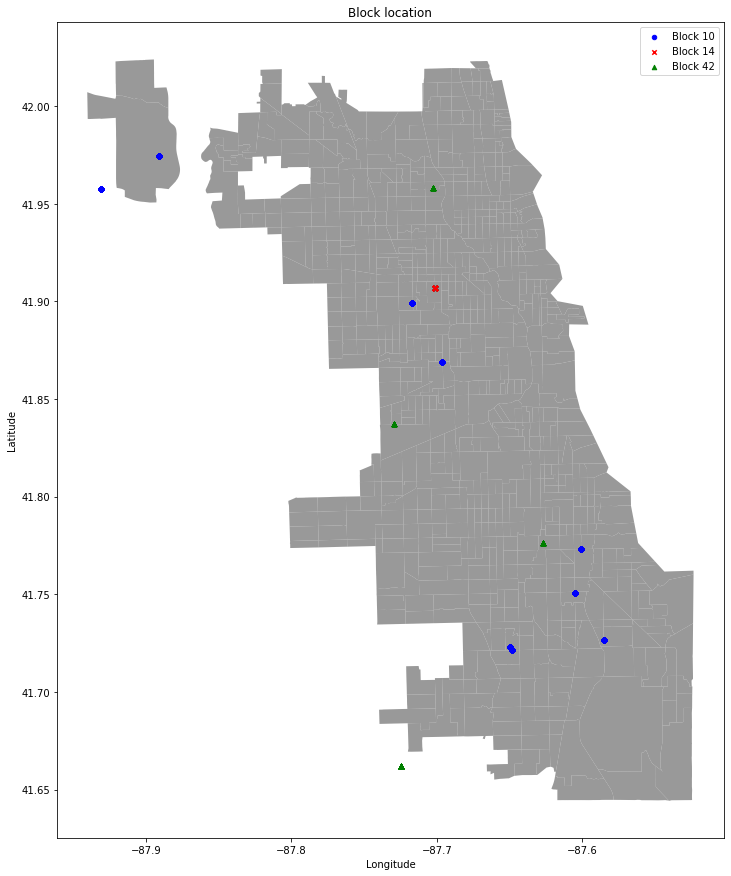

In [20]:
# Trying to visualize if block are specific areas

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[geo_df['Block'] == 10].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Block 10')
geo_df[geo_df['Block'] == 14].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Block 14')
geo_df[geo_df['Block'] == 42].plot(ax = ax, markersize = 20, color = 'green', marker = '^', label = 'Block 42')
plt.title('Block location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/blocks.png')

From our first look at the data, we were wondering if 'Block' represented a particular area/neighbourhood of the city and could be used to map mosquitoes or virus to a particular area of the city

Using the graph above, we can conclude that blocks are not specific areas of the city and can't be used to map mosquitoes or Virus to a specific area of the city

##### Virus Repartition

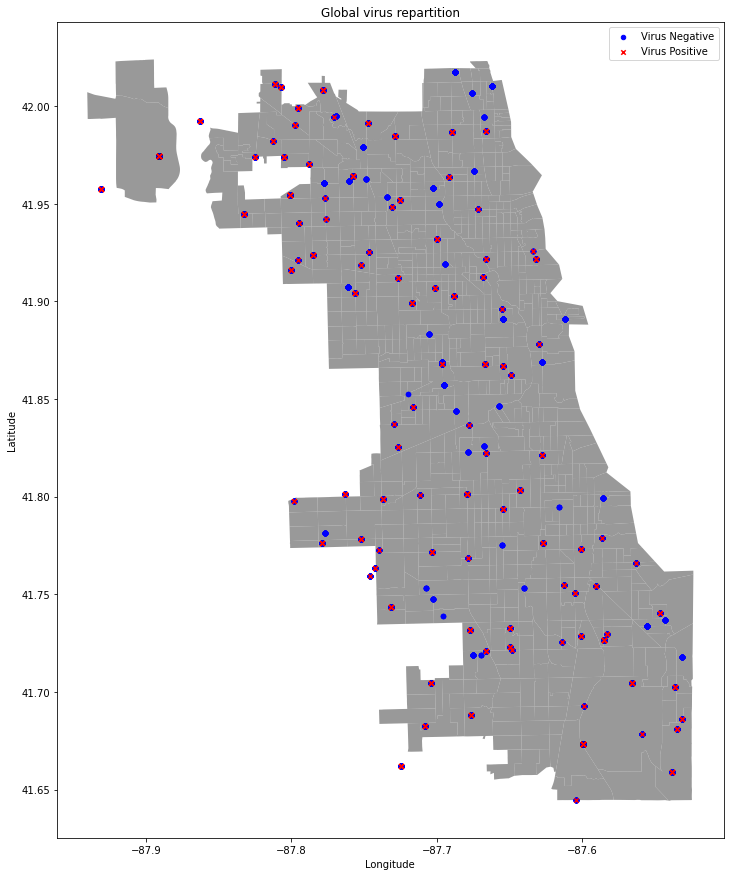

In [21]:
# See Global virus repartition

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[geo_df['WnvPresent'] == 0].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Negative')
geo_df[geo_df['WnvPresent'] == 1].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Virus Positive')
plt.title('Global virus repartition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_wnv.png')

From the graph above, we can see that Mosquitos carrying the virus have been identifed throughout the whole city and are not limited to a particular area of the city.

This means that if we focus our spray efforts on only zone where positive mosquitos have been detected we would have to spray the whole city. 

Let's see if the area of the city with positive mosquitoes have changed throughout the years.

###### 2007

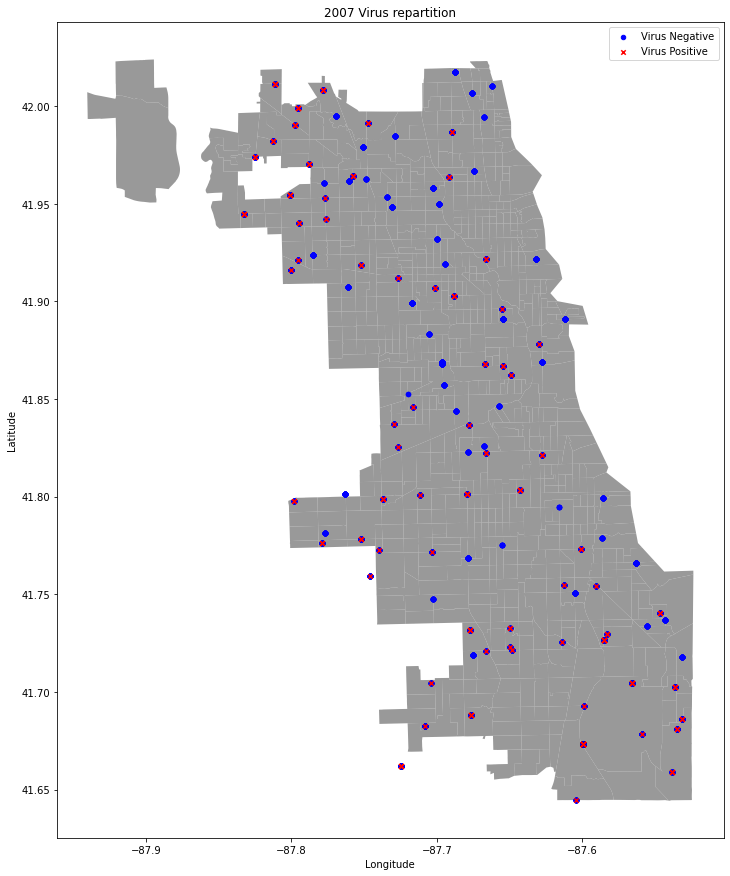

In [22]:
# See virus repartition for 2007

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[(geo_df['WnvPresent'] == 0) & (geo_df['year'] == 2007)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Negative')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2007)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Virus Positive')
plt.title('2007 Virus repartition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2007_wnv_repartition.png')

##### 2009

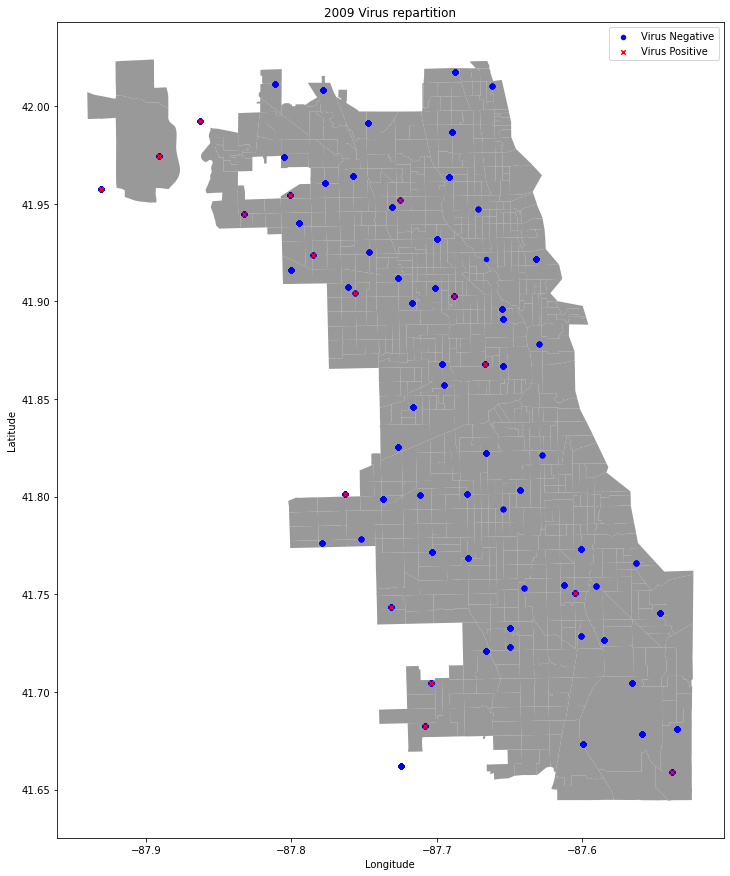

In [23]:
# See virus repartition for 2009

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[(geo_df['WnvPresent'] == 0) & (geo_df['year'] == 2009)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Negative')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2009)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Virus Positive')
plt.title('2009 Virus repartition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2009_virus_repartition.png')

###### 2011

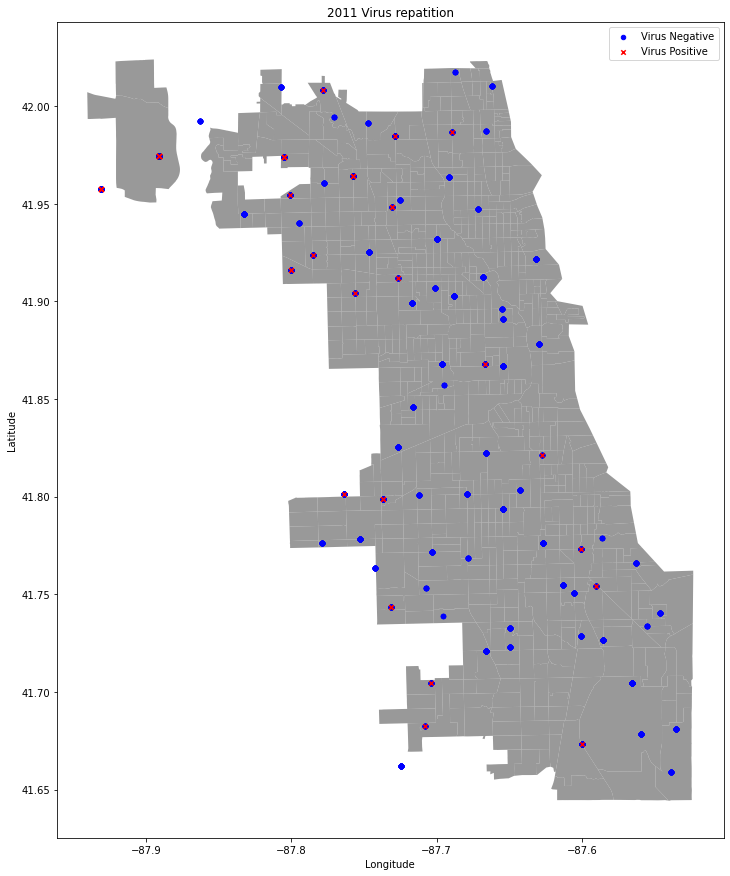

In [24]:
# See virus repartition for 2011

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[(geo_df['WnvPresent'] == 0) & (geo_df['year'] == 2011)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Negative')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2011)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Virus Positive')
plt.title('2011 Virus repatition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2011_virus_repartition.png')

###### 2013

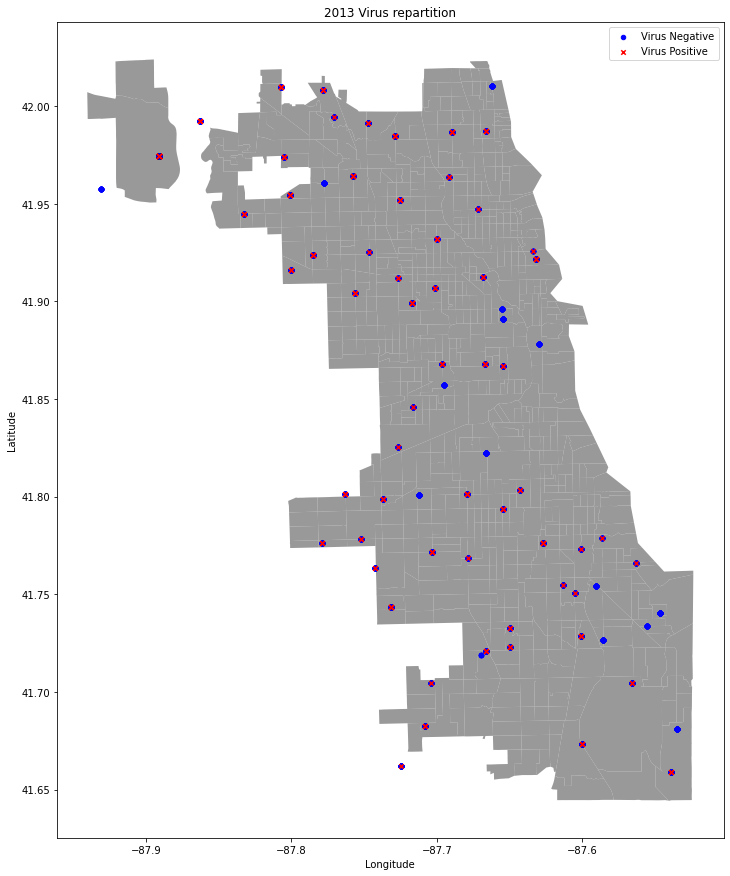

In [25]:
# See virus repartition for 2013

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[(geo_df['WnvPresent'] == 0) & (geo_df['year'] == 2013)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Negative')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2013)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Virus Positive')
plt.title('2013 Virus repartition')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2013_virus_repartition.png')

###### Global

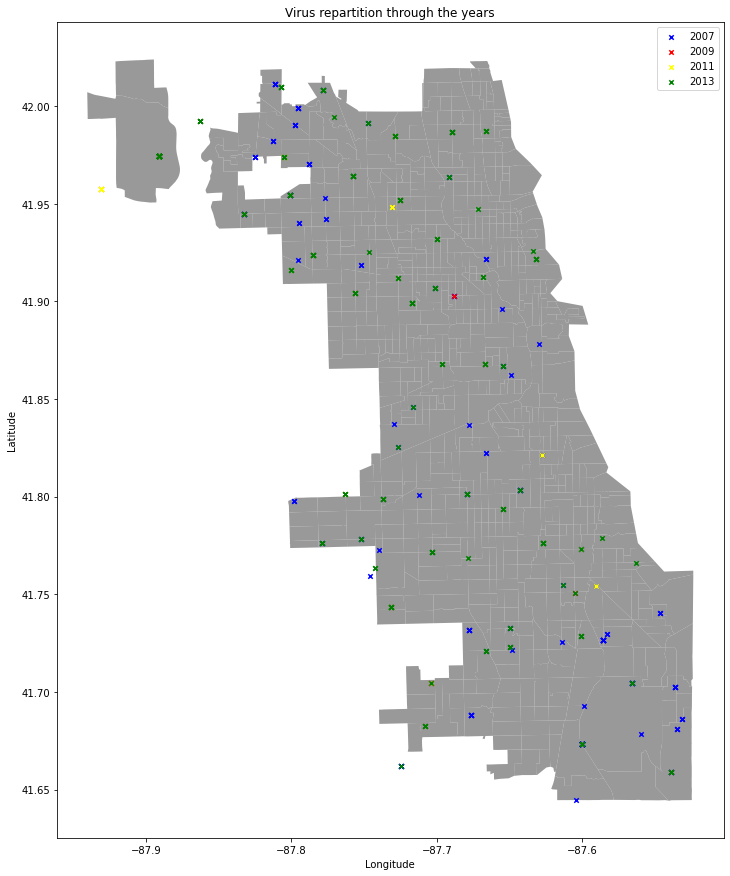

In [26]:
# Positive Virus repartition through the years

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2007)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = '2007')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2009)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = '2009')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2011)].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'x', label = '2011')
geo_df[(geo_df['WnvPresent'] == 1) & (geo_df['year'] == 2013)].plot(ax = ax, markersize = 20, color = 'green', marker = 'x', label = '2013')
plt.title('Virus repartition through the years')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_positive_virus.png')

<font color='red'>/!\ Points are overlapping and we only see the highest layer (2013).

<font color='red'>Be mindfull when using this graph

From the above graphs, we can see that the areas where mosquitos carrying the Wnv virus have been detected are consistent throughout the years. 

There doesn't seem to be a particular area where mosquitos are more likely to carry the virus each year.

Let's now have a look at mosquito density throughout different areas of Chicago and see if we can find interesting insight

##### Mosquitoes habitat and density

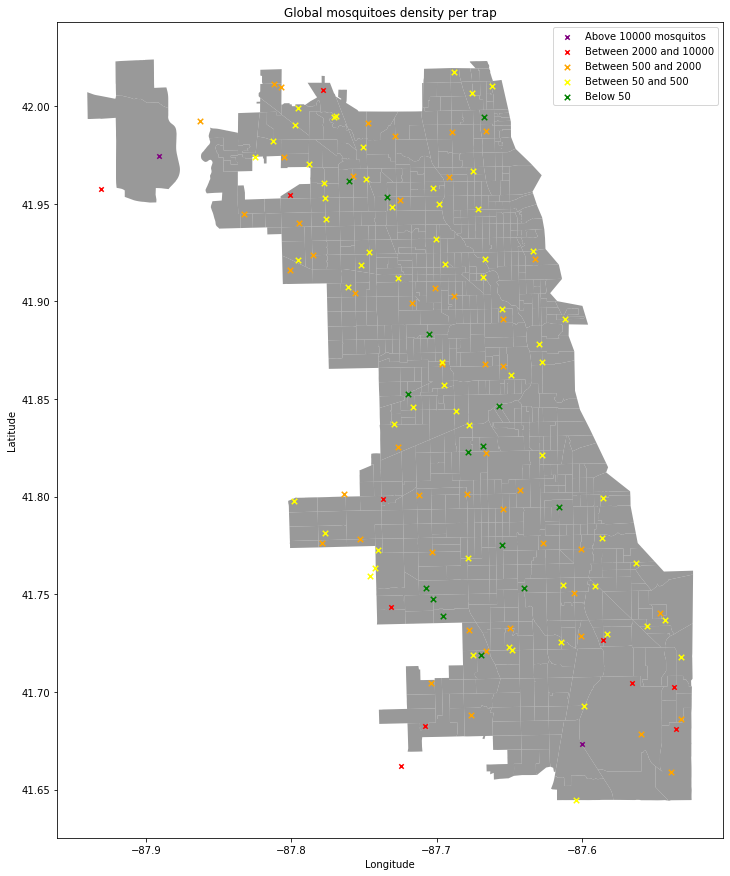

In [27]:
# Mosquitoes density

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
spray_mawnv[(spray_mawnv['NumMosquitos'] > 10000)].plot(ax = ax, markersize = 20, color = 'purple', marker = 'x', label = 'Above 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 10000) & (spray_mawnv['NumMosquitos'] >= 2000)].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Between 2000 and 10000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 2000) & (spray_mawnv['NumMosquitos'] >= 500)].plot(ax = ax, markersize = 30, color = 'orange', marker = 'x', label = 'Between 500 and 2000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 500) & (spray_mawnv['NumMosquitos'] >= 50)].plot(ax = ax, markersize = 30, color = 'yellow', marker = 'x', label = 'Between 50 and 500')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 50)].plot(ax = ax, markersize = 30, color = 'green', marker = 'x', label = 'Below 50')
plt.title('Global mosquitoes density per trap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_density.png')

Mosquitoes are found throughout the city of Chicago, however, the number of mosquitoes seem to vary from locations to other.

There are two areas with very high concentration of mosquitoes.
* Lake Calumet and industrial South Deering area
* East side of O'Hare Airport

For area with a high concentration of mosquitoes, they seem to be located in green and water point areas like:
* West O'Hare airport
* Wolf Lake - Eggers Grove
* Vet's Park
* Marian Byrnes Park and Natural area
* Wildwood park
* Park 601

or around green neighbourhoods of houses:
* Scottsdale
* Archer Heights
* South Mount Greenwood (close to Oak Hill Cemetery)

It seems that mosquito population seems to thrive in greener areas (Parks, Marshes) where body of permanent or semi-permanent water can be found. They are also found in high numbers in more industrial areas of the city (O'Hare airport and South Deering Area). 



##### Spray efforts from the Chicago City

The city of Chicago has sprayed some areas of the city in both 2011 and 2013.

This spraying was done in order to reduce the population of mosquitos.

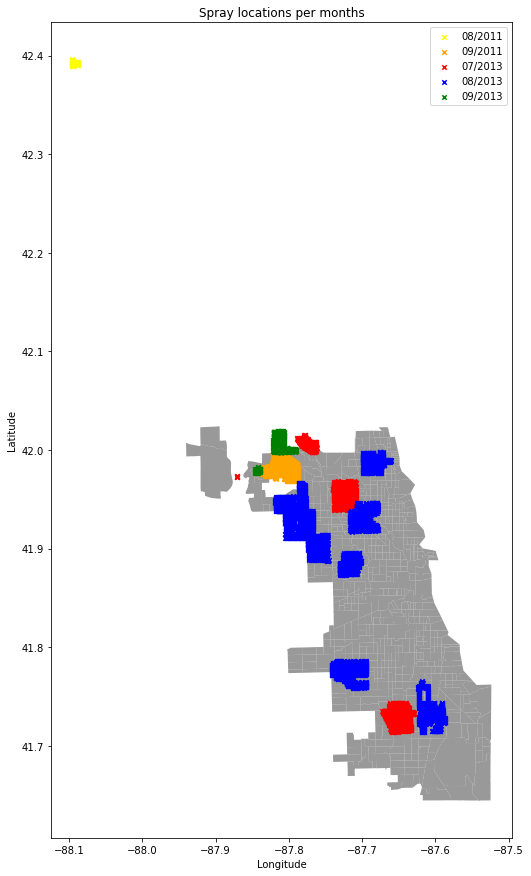

In [28]:
# Spray locations for 2011 and 2013

fig,ax = plt.subplots(figsize =(15,15))
chicago.plot(ax =ax, alpha = 0.8, color='grey')
spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 8) ].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'x', label = '08/2011')
spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 9) ].plot(ax = ax, markersize = 20, color = 'orange', marker = 'x', label = '09/2011')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 7) ].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = '07/2013')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 8) ].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = '08/2013')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 9) ].plot(ax = ax, markersize = 20, color = 'green', marker = 'x', label = '09/2013')
plt.title('Spray locations per months')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_spray.png')

The city of Chicago has done 54 waves of spraying between 2011 and 2013
* Two in 2011
* Three in 2013

It seems that during August 2011, the city has either sprayed an area far out of town or that the coordinates data provided is incorrect. In any case, we will not be making use of this data as it negatively impacts our map

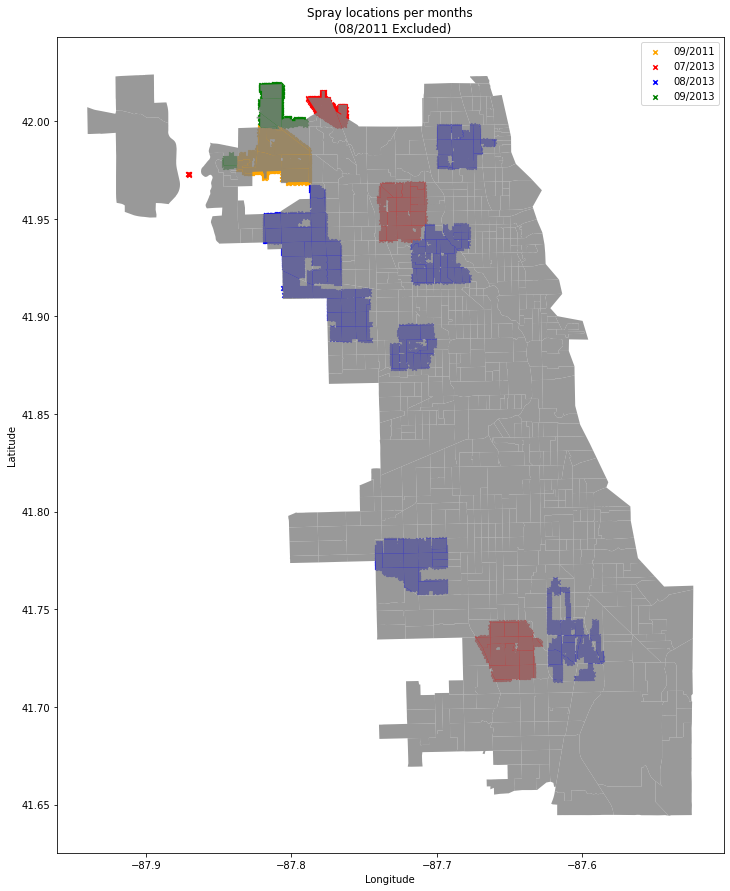

In [29]:
# Spray locations for 2011 and 2013 (without August 2011)

fig,ax = plt.subplots(figsize =(15,15))

spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 9) ].plot(ax = ax, markersize = 20, color = 'orange', marker = 'x', label = '09/2011')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 7) ].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = '07/2013')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 8) ].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = '08/2013')
spray_df[(spray_df['year'] == 2013) & (spray_df['month'] == 9) ].plot(ax = ax, markersize = 20, color = 'green', marker = 'x', label = '09/2013')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
plt.title('Spray locations per months\n (08/2011 Excluded)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_spray.png')

From the graph above, we can see that the areas aprayed are almost exclusively densly populated areas. 

It also seems that they have excluded parks and green areas from the spraying to focus on habitations.

Let's compare the areas sprayed with areas where the virus was detected and the mosquitoes density

###### Spray vs Virus Population

###### 2011

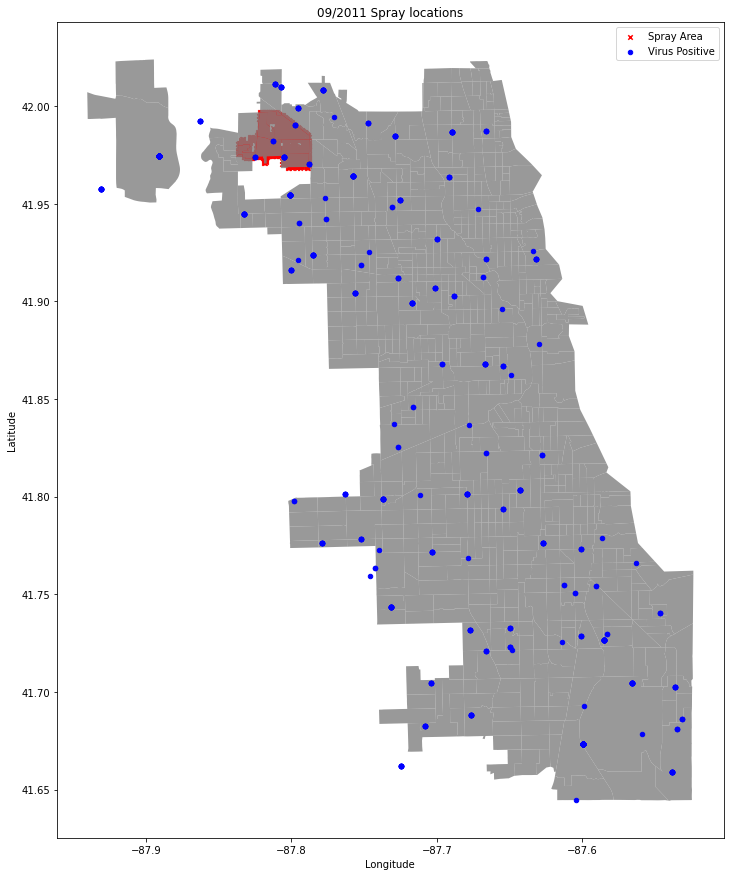

In [30]:
# Spray for September 2011 compared to positive virus locations

fig,ax = plt.subplots(figsize =(15,15))

spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 9) ].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Spray Area')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[geo_df['WnvPresent'] == 1].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Positive')
plt.title('09/2011 Spray locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2011_09_spray.png')

We can see that in September 2011, the city of chicago has concentrated it's spray effort on a limited area north west of the city.

This area correspond to Norwood Park and Orile Park. The most notable landmark in this area is the Ascension Resurection Medical Center.



###### 2013

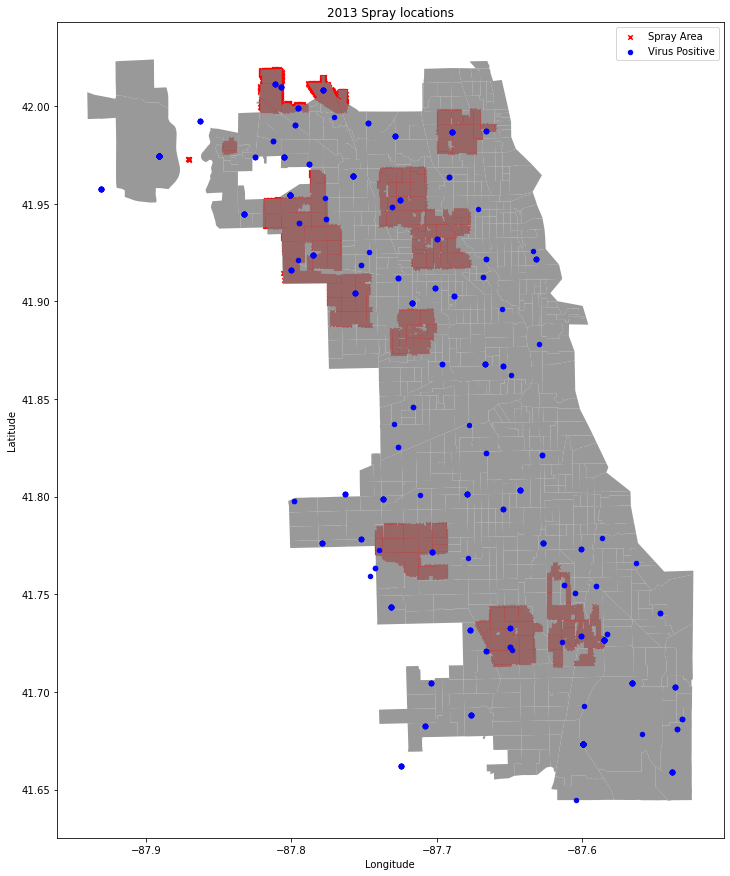

In [31]:
# Spray for 2013 compared to positive virus locations

fig,ax = plt.subplots(figsize =(15,15))

spray_df[spray_df['year'] == 2013].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label = 'Spray Area')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
geo_df[geo_df['WnvPresent'] == 1].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Virus Positive')
plt.title('2013 Spray locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2013_spray.png')

During 2013 however, we can see that the city has intensified it's spray efforts and broadened it to more locations throughout the city.

If we compare these locations to the city layout, we can see that all the areas sprayed are urban areas.

They have clearly avoided spraying parks and green areas

###### Spray vs Mosquitoes Population

###### 2011

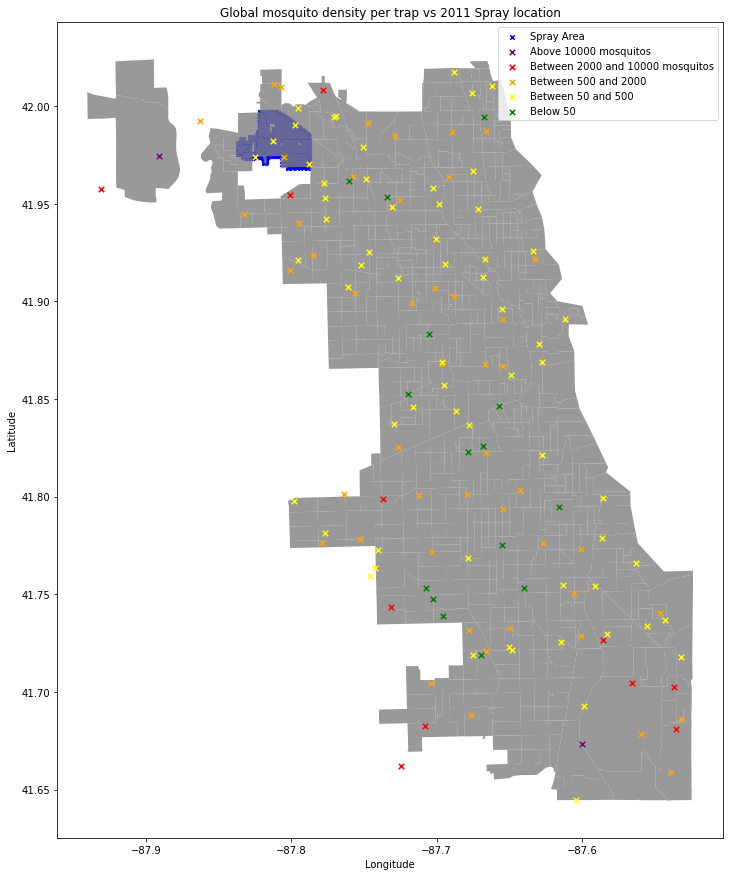

In [32]:
# Compare number of mosquitos with areas sprayed 2011

fig,ax = plt.subplots(figsize =(15,15))

spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 9)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = 'Spray Area')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
spray_mawnv[spray_mawnv['NumMosquitos'] >= 10000].plot(ax = ax, markersize = 30, color = 'purple', marker = 'x', label = 'Above 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 10000) & (spray_mawnv['NumMosquitos'] >= 2000)].plot(ax = ax, markersize = 30, color = 'red', marker = 'x', label = 'Between 2000 and 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 2000) & (spray_mawnv['NumMosquitos'] >= 500)].plot(ax = ax, markersize = 30, color = 'orange', marker = 'x', label = 'Between 500 and 2000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 500) & (spray_mawnv['NumMosquitos'] >= 50)].plot(ax = ax, markersize = 30, color = 'yellow', marker = 'x', label = 'Between 50 and 500')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 50)].plot(ax = ax, markersize = 30, color = 'green', marker = 'x', label = 'Below 50')
plt.title('Global mosquito density per trap vs 2011 Spray location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2011_spray_vs_density.png')

If we compare the areas sprayed with the areas with higher concentration of mosquitos, we can see that in 2011, the area that was sprayed was not among the highest mosquito density at all.

It was done in an area with relatively low concentration of mosquitos.

###### 2013

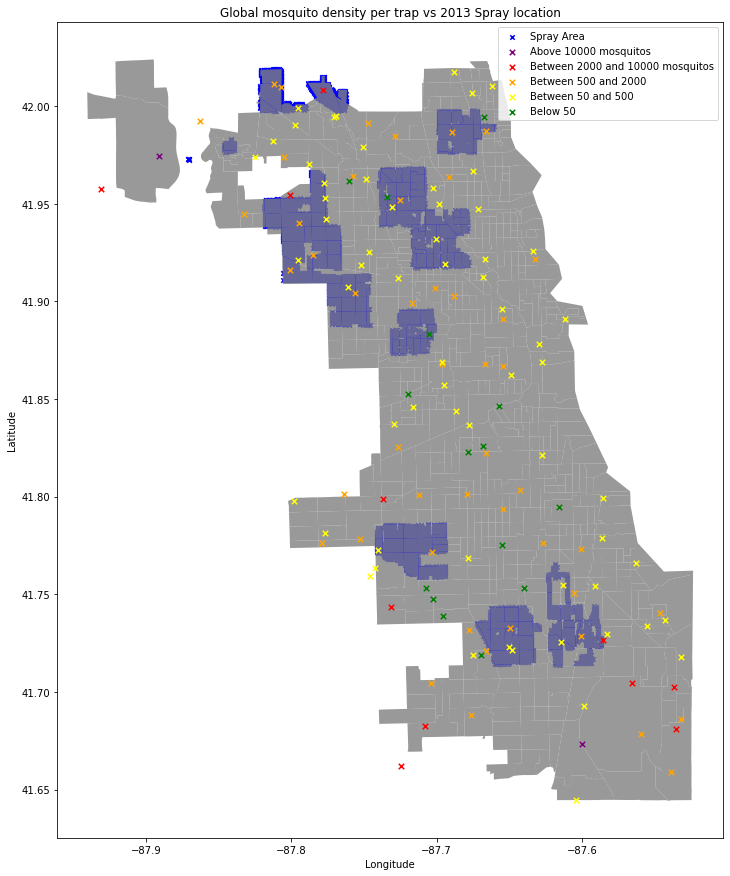

In [33]:
# Compare number of mosquitos with areas sprayed 2013

fig,ax = plt.subplots(figsize =(15,15))

spray_df[spray_df['year'] == 2013].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = 'Spray Area')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
spray_mawnv[spray_mawnv['NumMosquitos'] >= 10000].plot(ax = ax, markersize = 30, color = 'purple', marker = 'x', label = 'Above 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 10000) & (spray_mawnv['NumMosquitos'] >= 2000)].plot(ax = ax, markersize = 30, color = 'red', marker = 'x', label = 'Between 2000 and 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 2000) & (spray_mawnv['NumMosquitos'] >= 500)].plot(ax = ax, markersize = 30, color = 'orange', marker = 'x', label = 'Between 500 and 2000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 500) & (spray_mawnv['NumMosquitos'] >= 50)].plot(ax = ax, markersize = 30, color = 'yellow', marker = 'x', label = 'Between 50 and 500')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 50)].plot(ax = ax, markersize = 30, color = 'green', marker = 'x', label = 'Below 50')
plt.title('Global mosquito density per trap vs 2013 Spray location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/2013_spray_vs_density.png')

###### Global

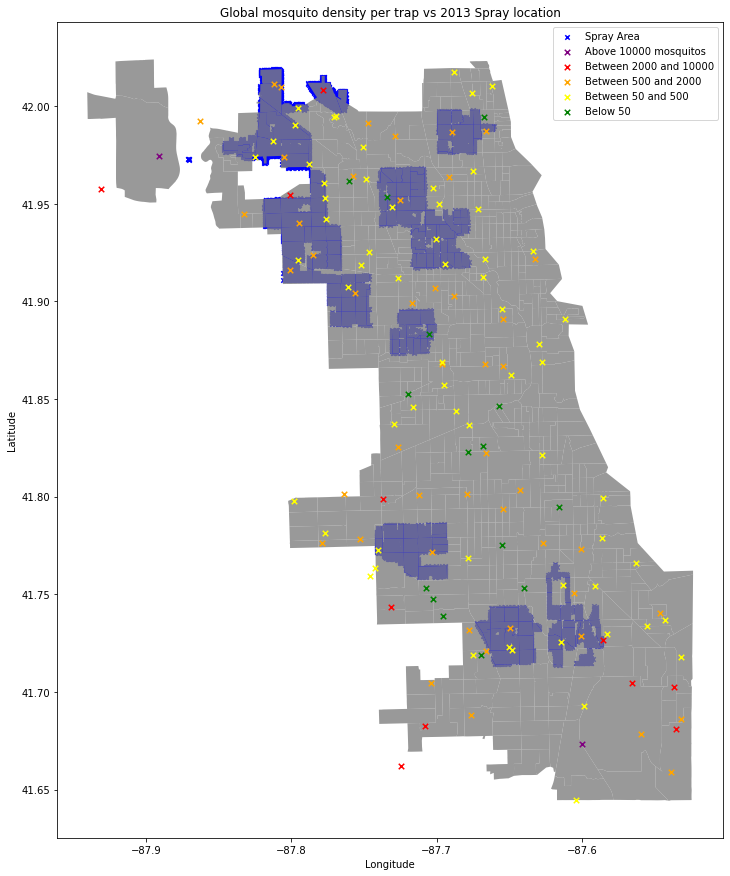

In [34]:
# Compare number of mosquitos with areas sprayed Global

fig,ax = plt.subplots(figsize =(15,15))

spray_df[(spray_df['year'] == 2013)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x', label = 'Spray Area')
spray_df[(spray_df['year'] == 2011) & (spray_df['month'] == 9)].plot(ax = ax, markersize = 20, color = 'blue', marker = 'x')
chicago.plot(ax =ax, alpha = 0.8, color='grey')
spray_mawnv[spray_mawnv['NumMosquitos'] >= 10000].plot(ax = ax, markersize = 30, color = 'purple', marker = 'x', label = 'Above 10000 mosquitos')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 10000) & (spray_mawnv['NumMosquitos'] >= 2000)].plot(ax = ax, markersize = 30, color = 'red', marker = 'x', label = 'Between 2000 and 10000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 2000) & (spray_mawnv['NumMosquitos'] >= 500)].plot(ax = ax, markersize = 30, color = 'orange', marker = 'x', label = 'Between 500 and 2000')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 500) & (spray_mawnv['NumMosquitos'] >= 50)].plot(ax = ax, markersize = 30, color = 'yellow', marker = 'x', label = 'Between 50 and 500')
spray_mawnv[(spray_mawnv['NumMosquitos'] < 50)].plot(ax = ax, markersize = 30, color = 'green', marker = 'x', label = 'Below 50')
plt.title('Global mosquito density per trap vs 2013 Spray location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.savefig('data/charts/global_spray_vs_density.png')

For 2013, we have a similar result as 2011.

Areas that were sprayed are not among the areas with the highest population of mosquitoes (with the exception of the furthest north area of Wildwood/North Edgebrook).
* Belmont Cragin/Garden has even been sprayed despite having a recorded population of less than 50 mosquitoes in the traps.

Once again, they also have clearly avoided parks and green areas to focus on habitations.



##### Spraying costs and optimisations

Surface sprayed per years:

|          	|               Area Name              	| km/sqr 	| mil/sqr 	|  acres  	|
|----------	|:------------------------------------:	|:------:	|:-------:	|:-------:	|
| **2011** 	| Union Ridge, Old Norwood Oriole Park 	| 8.48   	| 3.27    	| 2095.45 	|




|           	|                        Area Name                        	| km/sqr 	| mil/sqr 	|   acres  	|
|-----------	|:-------------------------------------------------------:	|:------:	|:-------:	|:--------:	|
|           	| Edison Park Area                                        	| 3.50   	| 1.35    	|          	|
|           	| North Edgebrook Wildwood                                	| 2.01   	| 1.24    	|          	|
|           	| Arcadia Terrace Bowmanville                             	| 5.03   	| 1.94    	|          	|
|           	| Irving Park, Avondale Palmer Square, Bucktown Bricktown 	| 18.92  	| 7.31    	|          	|
| **2013**  	| Dunning, Montclare Belmont, Austin                      	| 22.84  	| 8.82    	|          	|
|           	| Garfield Park                                           	| 6.20   	| 2.39    	|          	|
|           	| West Lawn                                               	| 9.47   	| 3.66    	|          	|
|           	| Brainerd, Longwood Manor                                	| 8.17   	| 3.15    	|          	|
|           	| Burnside, Chatham                                       	| 7.66   	| 2.96    	|          	|
| **Total** 	|                                                         	| 83.8   	| 32.35   	| 20707.43 	|

In 2013, the city of Chicago has sprayed a surface 10 time bigger than in 2011.


Important Information:
* It uses Zenivex insecticides to kill adult mosquitoes when West Nile Virus infected mosquitoes have been detected
    * From July to September
* Insecticide is sprayed by a truck mounted fogger in a process called Ultra Low Volume fogging to use small amount of pesticides. Flying mosquitoes are killed by contact with the fog. Mosquito spraying is done at night when mosquitoes are active and traffic is minimal.
    * Spraying is done from Dusk till 1am
    * Each spraying required at least 2 technicians as well as supervisors from Chicago Department of Streets and Sanitations
        * We can assume that they use several trucks and several supervisors teams.
* Only 1.5 ounces of pesticides are needed per acre
* According to Central Mosquito Control, cost of Zenivec E20 is 67c per acre
* According to North Dakota Health Department webiste, Zenivex E4 costs 89.60 per gallon for 30 gallon drums

|      	| Total Acre 	| Ounce per Acre 	| Total Ounces 	| Ounce per Gallon 	| Total Gallon 	| Price for 30 Gallon Drum 	| Number of Drum needed 	| Total Price 	|
|------	|------------	|----------------	|--------------	|------------------	|--------------	|--------------------------	|-----------------------	|-------------	|
| 2011 	|   2095.45  	|       1.5      	|    3143.17   	|        128       	|     24.55    	|           2688           	|           1           	|     2688    	|        9 (8.08)       	|    24192    	|


|      	| Total Acre 	| Ounce per Acre 	| Total Ounces 	| Ounce per Gallon 	| Total Gallon 	| Price for 30 Gallon Drum 	| Number of Drum needed 	| Total Price 	|
|------	|------------	|----------------	|--------------	|------------------	|--------------	|--------------------------	|-----------------------	|-------------	|
| 2013 	|  20707.43  	|       1.5      	|   31,061.14  	|        128       	|    242.66    	|           2688           	|        9 (8.08)       	|    24192    	|
               
               


Proposed spraying plan:

The plan we propose is two parts:
* Spray areas with the highest density of mosquitoes once per year BEFORE/WHEN MOSQUITOES ARE MOST PRESENT
* Spray blocks where positive mosquitoes are detected

This will allow us to regulate the population of mosquitoes and limit the spread between mosquitoes. This will also enable us to do timely spray on positive clusters and reduce chances of mosquitoes transmitting virus to human.



**1. Spray areas with the highest density of mosquitoes:**

|                                            	| km/sqr  	| mil/sqr 	| acres    	|
|--------------------------------------------	|---------	|---------	|----------	|
| O'Hare Airport                             	| 25.58   	| 9.88    	|          	|
| Lake Calumet South Deering Industrial Area 	| 13.96   	| 5.39    	|          	|
| Park 601 Dunning Area                      	| 0.00081 	| 0.00031 	|          	|
| Old Edgebrook Park                         	| 2.63    	| 1.02    	|          	|
| Mount Greenwood, Mount Olivet              	| 1.02    	| 0.39    	|          	|
| Marian R Byrnes Natural Area               	| 0.5     	| 0.2     	|          	|
| Wolf Lake, Lost Marsh                      	| 8.85    	| 3.42    	|          	|
| Scottsdale                                 	| 2.54    	| 1       	|          	|
| **Total**                                  	| 55.89   	| 21.57   	| 13810.72 	|

| Total Acre 	| Ounce per Acre 	| Total Ounces 	| Ounce per Gallon 	| Total Gallons 	| Price for 30 Gallon Drum 	| Number of Drums needed 	| Total Price 	|
|------------	|----------------	|--------------	|------------------	|---------------	|--------------------------	|------------------------	|-------------	|
|  13810.72  	|       1.5      	|   20716.08   	|        128       	|     161.84    	|           2688           	|        6 (5.39)        	|    16128    	|


**2. Timely spray whenever a cluster is detected:**

* Spray 0.15 acres around positive traps (60702.8 meter/sqr - 1 block)
    * 0.225 ounce needed to spray area
        * 128 ounce per gallon/ 0.0018% of a gallon
            * 60 cents per spray.
            
| Total Acre 	| Ounce per Acre 	| Total Ounces 	| Ounce per Gallon 	| Total Gallons 	| Price for 30 Gallon Drum 	| Number of Drums needed 	| Total Price (Per Spray) 	|
|------------	|----------------	|--------------	|------------------	|---------------	|--------------------------	|------------------------	|-------------------------	|
|    0.15    	|       1.5      	|     0.225    	|        128       	|     0.0017    	|           2688           	|            1           	|           0.16          	|   


Let's take the count of positive virus per year:

| 2007 	| 472 	|
|------	|-----	|
| 2009 	| 38  	|
| 2011 	| 114 	|
| 2013 	| 478 	|

We will take the average amount of year 2007 and 2013 as they are the year with the highest amount and are pretty close in terms of number: **475**.
* if we do 475 timely remediation spray throughout each year, it will cost **76 dollar** for Zenivex.

**3. Manpower and logistic costs**

Assuming we need 4 people (2 technicians and 2 Supervisors) in order to spray each area in 2011 and 2013 and that each spraying takes around 5 hours. 
- 16 dollar (20 dollars for night work) per hour for each persones involved. 
    * 400 dollar wages per spray
    
On top of this we need to add logistics and material costs plus maintenance.

Since, we are also targetting parks and green areas, it makes it much harder (impossible) for technicians to spray using trucks.

Instead, we would recommend the usage of drones to reach and spray over these harder to reach places. They would also be useful whe it comes to precise spraying, allowing for more targeted applications.

Acquisition and maintenance of drones is cheaper than fleet of trucks
Two persons needed to apply the spray using the drone.
* Drones have limited capacity, but would be perfect for the timely sprays covering small areas.

### Conclusion


From our analysis, it seems that the spraying efforts in 2011 and 2013 are not very efficient to reduce the population of mosquitoes in the city of Chicago. 

* The two main areas with the highest density of mosquitoes (O'Hare Airport and Lake Calumet/industrial South Deering area) have not been sprayed by the city despite having a number of mosquitoes far superior to other areas of the city.
* Most of the areas sprayed are habitation areas with a relatively low concentration of mosquitoes. 

Even though the focus should be reducing the risk of human getting infected by the west nile virus, we believe that spraying areas with higher concentration of mosquitoes would be a better course of action.

Since we also know that higher concentration of mosquitoes also equals to more mosquitoes carrying the Wnv, reducing the population of mosquitoes appears to be a necessity.
* Since the spread of Wnv to mosquitoes is done through birds infected by other mosquitoes, reducing clusters of mosquitoes would reduce the chances of birds getting infected by mosquitoes.
* If less birds are being infected by mosquitoes, they are also less likely to transmit the virus to other mosquitoes
* This ultimately would lead to less mosquitoes being able to transmit the virus to humans.

### Recommendations

* Focus periodic spraying efforts on parks and green areas that have a higher concentration of mosquitoes instead of habitations areas
* Do timely spraying efforts in areas where virus outbreaks are detected
    . This can also be done through the use of drone to reduce the manpower cost and reach areas that a truck spraying pesticide wouldn't be able to reach.